 ### Exemplo de aprendizagem supervisionada: Regressão linear simples

Como exemplo desse processo, vamos considerar uma regressão linear simples, ou seja, o caso comum de ajustar uma linha a dados com a forma $(x, y)$.

Vamos gerar o seguinte conjunto de dados para nosso exemplo de regressão:

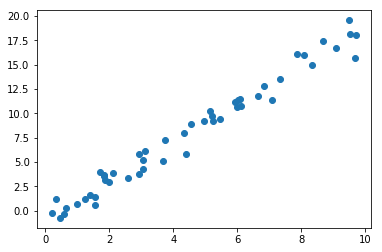

In [2]:
#importando biblioteca de visualização de dados e numpy
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression

#jupyter magic command para que não precisemos chamar o .show() em cada plot
%matplotlib inline 


#criação de uma dispersão linear randômica. 42 is always the answer
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

# Traçamos
plt.scatter(x, y);

In [15]:
x.shape

(50,)

In [29]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [31]:
iris.tail()

sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

In [32]:
iris.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [33]:
iris.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

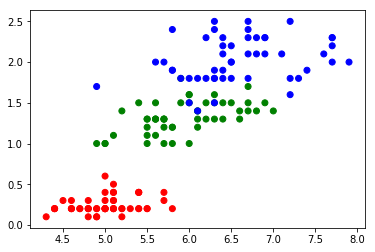

In [34]:
fig, ax = plt.subplots()
colors = {'setosa':'red', 'virginica':'blue', 'versicolor':'green'}

ax.scatter(iris['sepal_length'],
           iris['petal_width'],
           c=iris['species'].apply(lambda x: colors[x])
          )

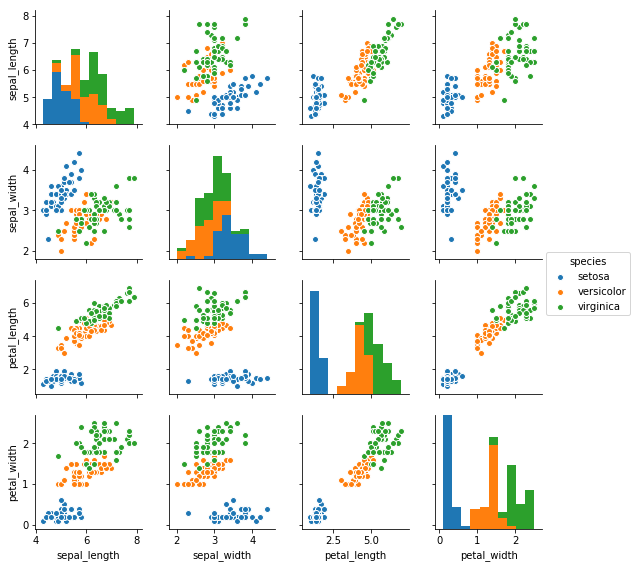

In [35]:
import seaborn as sns

sns.pairplot(iris, hue="species", size=2)

In [37]:
X_iris = iris[['sepal_length', ]]

In [38]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [39]:
y_iris = iris['species']
y_iris.shape

(150,)

In [40]:
from sklearn.naive_bayes import GaussianNB # 1. escolher a classe de modelo
model = GaussianNB() # 2. instanciar o modelo
model.fit(X_iris, y_iris) # 3. ajustar o modelo aos dados
yhat = model.predict(X_iris) # 4. prever
yhat

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica',

In [43]:
comparativo = list(zip(list(y_iris), list(yhat)))

acertos = 0
erros = 0

for row in comparativo:
    if row[0]==row[1]:
        acertos += 1
    else:
        erros += 1
        
print(f'''Acertos: {acertos},
Erros: {erros},
Taxa: {acertos/(acertos+erros)}''')

Acertos: 144,
Erros: 6,
Taxa: 0.96


In [45]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [46]:
print(Xtest.shape)
print(ytest.shape)

(38, 4)
(38,)


In [47]:
print(Xtrain.shape)
print(ytrain.shape)

(112, 4)
(112,)


In [48]:
from sklearn.naive_bayes import GaussianNB # 1. escolher a classe de modelo
model = GaussianNB() # 2. instanciar o modelo
model.fit(Xtrain, ytrain) # 3. ajustar o modelo aos dados
yhat = model.predict(Xtest) # 4. prever com dados *NOVOS* (que não participaram do treino)

In [49]:
# from sklearn.metrics import accuracy_score # método nutella
# accuracy_score(ytest, y_model)

comparativo = list(zip(list(ytest), list(yhat)))

acertos = 0
erros = 0
for row in comparativo:
    if row[0]==row[1]:
        acertos += 1
    else:
        erros += 1
        
print(f'''Acertos: {acertos},
Erros: {erros},
Taxa: {acertos/(acertos+erros)}''')

Acertos: 37,
Erros: 1,
Taxa: 0.9736842105263158


Com precisão superior a 97%, podemos ver que até mesmo esse simples algoritmo de classificação é efetivo para esse conjunto de dados específico.

### Exemplo de aprendizagem não supervisionada: Dimensionalidade de Iris


In [50]:
# 1. Selecionar a classe de modelo
from sklearn.decomposition import PCA  

# 2. Instanciar o modelo com hiperparâmetros
model = PCA(n_components=2)

# 3. Ajustar aos dados. Observar que não especificamos “y” 
model.fit(X_iris)

# 4. Transformar os dados em duas dimensões
X_2D = model.transform(X_iris)

In [51]:
X_iris.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [52]:
X_2D[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

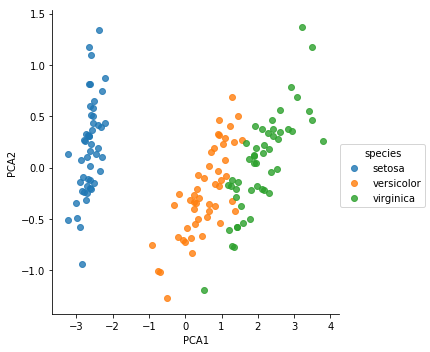

In [53]:
iris_pca = iris.copy(deep=True)
iris_pca['PCA1'] = X_2D[:, 0]
iris_pca['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris_pca, fit_reg=False);

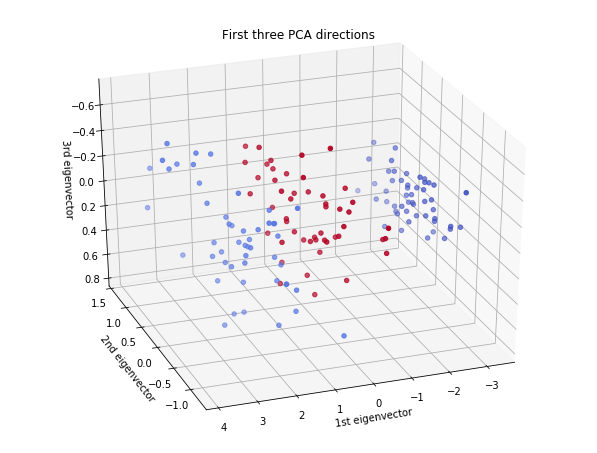

In [172]:
from mpl_toolkits.mplot3d import Axes3D

# Podemos também reduzir as 4 dimensões originais para 3 por exemplo e plotar um gráfico em 3d:
iris = sns.load_dataset('iris')

X = X_iris
Y = y_iris
z = {'setosa': 5, 'versicolor': 25, 'virginica': 7}

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X_iris)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y.map(z),
           cmap=plt.cm.coolwarm)

ax.set_title("First three PCA directions")

ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()

### Aprendizagem não supervisionada: Clustering com Iris


In [54]:
# 1. Escolhemos a classe de modelo
from sklearn.mixture import GaussianMixture

# 2. Instanciamos o modelo com hiperparâmetros
model = GaussianMixture(n_components=3, covariance_type='full')

# 3. Ajustamos aos dados. Observar que “y” não é especificado
model.fit(X_iris)

# 4. Definimos os nomes dos clusters
y_gmm = model.predict(X_iris)  

In [57]:
iris_pca['cluster'] = y_gmm
iris_pca

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
5             5.4          3.9           1.7          0.4     setosa   
6             4.6          3.4           1.4          0.3     setosa   
7             5.0          3.4           1.5          0.2     setosa   
8             4.4          2.9           1.4          0.2     setosa   
9             4.9          3.1           1.5          0.1     setosa   
10            5.4          3.7           1.5          0.2     setosa   
11            4.8          3.4           1.6          0.2     setosa   
12            4.8          3.0           1.4          0.1     setosa   
13            4.3          3.0           1.1          0.1     setosa   
14            5.8          4.0           1.2          0.2     setosa   
15            5.7          4.4           1.5          0.4     setosa   
16            5.4          3.9           1.3          0.4     setosa   
17            5.1          3.5           1.4          0.3     setosa   
18            5.7          3.8           1.7          0.3     setosa   
19            5.1          3.8           1.5          0.3     setosa   
20            5.4          3.4           1.7          0.2     setosa   
21            5.1          3.7           1.5          0.4     setosa   
22            4.6          3.6           1.0          0.2     setosa   
23            5.1          3.3           1.7          0.5     setosa   
24            4.8          3.4           1.9          0.2     setosa   
25            5.0          3.0           1.6          0.2     setosa   
26            5.0          3.4           1.6          0.4     setosa   
27            5.2          3.5           1.5          0.2     setosa   
28            5.2          3.4           1.4          0.2     setosa   
29            4.7          3.2           1.6          0.2     setosa   
..            ...          ...           ...          ...        ...   
120           6.9          3.2           5.7          2.3  virginica   
121           5.6          2.8           4.9          2.0  virginica   
122           7.7          2.8           6.7          2.0  virginica   
123           6.3          2.7           4.9          1.8  virginica   
124           6.7          3.3           5.7          2.1  virginica   
125           7.2          3.2           6.0          1.8  virginica   
126           6.2          2.8           4.8          1.8  virginica   
127           6.1          3.0           4.9          1.8  virginica   
128           6.4          2.8           5.6          2.1  virginica   
129           7.2          3.0           5.8          1.6  virginica   
130           7.4          2.8           6.1          1.9  virginica   
131           7.9          3.8           6.4          2.0  virginica   
132           6.4          2.8           5.6          2.2  virginica   
133           6.3          2.8           5.1          1.5  virginica   
134           6.1          2.6           5.6          1.4  virginica   
135           7.7          3.0           6.1          2.3  virginica   
136           6.3          3.4           5.6          2.4  virginica   
137           6.4          3.1           5.5          1.8  virginica   
138           6.0          3.0           4.8          1.8  virginica   
139           6.9          3.1           5.4          2.1  virginica   
140           6.7          3.1           5.6          2.4  virginica   
141           6.9          3.1           5.1          2.3  virginica   
142           5.8          2.7           5.1          1.9  virginica   
143           6.8          3.2           5.9 

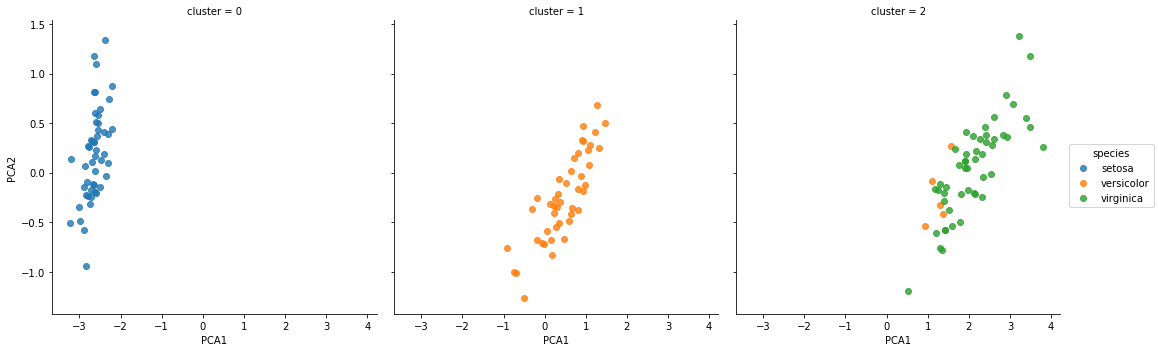

In [175]:
sns.lmplot("PCA1", "PCA2", data=iris_pca, hue='species', col='cluster', fit_reg=False);